# String generation

In [1]:
from pandas import DataFrame
from pandas import concat
import pandas as pd
import numpy as np
import random
a = []
for i in range(0,40000):
    if i%2!=0:
        a.append(0)
    else:
        a.append(1)
def for_zero(l,a):
    for j in a :
      M=random.randint(1,10)      
      if j ==0:              
          for o in range(M):
              l.append(1)
      else:                 
          l.append(0)
      if len(l)==40000:
        break
    return l
#80 length
p=[]
out=for_zero(p,a)
out2 = out[:40000]
import numpy as np
out2 = np.array(out2).reshape([500, 80])
import pandas as pd
df = pd.DataFrame(out2)
df['Target'] = 0
df.to_csv(r'D:\Class0_80.csv',index=False,header=False)



In [2]:
Class0 = pd.read_csv(r'D:\Class0_80.csv',header=None)
Class1 = pd.read_csv(r'D:\Class1_80.csv',header=None)
a=pd.read_csv(r'D:\class0_80.csv', header=None)
b=pd.read_csv(r'D:\class1_80.csv', header=None)
A=pd.concat([a,b])
A.shape
my_data=np.array(A)
my_data.shape

(1000, 81)

In [3]:
Class1 = A.iloc[:,:-1]
y = A.iloc[:,-1]
Class1 = np.array(Class1)


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Class1, y, test_size=0.3,stratify=y, shuffle=True)

In [5]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_train=np.array(y_train)
y_test = np.array(y_test)

In [6]:
x_train.shape, x_test.shape

((700, 80, 1), (300, 80, 1))

In [7]:
y_train

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Series to supervised

In [8]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [9]:
data1 = series_to_supervised(my_data, 7)
data2 = series_to_supervised(my_data, 20)

In [10]:
data1.shape,data2.shape

((993, 648), (980, 1701))

In [11]:
#7
D7 = data1.iloc[:,:-1]
L7 = data1.iloc[:,-1]

#20
D20 = data2.iloc[:,:-1]
L20 = data2.iloc[:,-1]
#7
D7 = np.array(D7)
L7 = np.array(L7)
#20
D20 = np.array(D20)
L20 = np.array(L20)


from sklearn.model_selection import train_test_split
x_trainmlp, x_testmlp, y_trainmlp, y_testmlp = train_test_split(D7, L7, test_size=0.20, random_state=0,shuffle=True)
x_train1mlp, x_test1mlp, y_train1mlp, y_test1mlp = train_test_split(D20, L20, test_size=0.20, random_state=0,shuffle=True)

x_trainmlp.shape,x_testmlp.shape,y_trainmlp.shape,y_testmlp.shape
x_train1mlp.shape,x_test1mlp.shape,y_train1mlp.shape,y_test1mlp.shape

((784, 1700), (196, 1700), (784,), (196,))

# MLP

In [12]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(64, input_dim=1700, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(16, activation='relu')) #
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(128,input_dim=1701,activation='relu')) #
model.add(Dropout(0.6))  #
model.add(Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                108864    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 117,313
Trainable params: 117,313
Non-trainable params: 0
________________________________________________

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train1mlp, y_train1mlp,
                    epochs=80,
                    batch_size=64,
                    validation_data=(x_test1mlp, y_test1mlp))

Train on 784 samples, validate on 196 samples
Epoch 1/80
784/784 [==============================] - 1s 762us/step - loss: 0.7586 - accuracy: 0.5791 - val_loss: 0.5180 - val_accuracy: 0.6990
Epoch 2/80
784/784 [==============================] - 0s 65us/step - loss: 0.6056 - accuracy: 0.6365 - val_loss: 0.4548 - val_accuracy: 0.8112
Epoch 3/80
784/784 [==============================] - 0s 65us/step - loss: 0.5542 - accuracy: 0.6824 - val_loss: 0.4173 - val_accuracy: 0.8776
Epoch 4/80
784/784 [==============================] - 0s 62us/step - loss: 0.4961 - accuracy: 0.7551 - val_loss: 0.3824 - val_accuracy: 0.9388
Epoch 5/80
784/784 [==============================] - 0s 64us/step - loss: 0.4565 - accuracy: 0.7730 - val_loss: 0.3482 - val_accuracy: 0.9490
Epoch 6/80
784/784 [==============================] - 0s 62us/step - loss: 0.4564 - accuracy: 0.7628 - val_loss: 0.3127 - val_accuracy: 0.9796
Epoch 7/80
784/784 [==============================] - 0s 64us/step - loss: 0.4039 - accuracy: 0

784/784 [==============================] - 0s 59us/step - loss: 0.0442 - accuracy: 0.9898 - val_loss: 0.0302 - val_accuracy: 0.9898
Epoch 58/80
784/784 [==============================] - 0s 62us/step - loss: 0.0505 - accuracy: 0.9872 - val_loss: 0.0240 - val_accuracy: 0.9949
Epoch 59/80
784/784 [==============================] - 0s 60us/step - loss: 0.0486 - accuracy: 0.9898 - val_loss: 0.0241 - val_accuracy: 0.9949
Epoch 60/80
784/784 [==============================] - 0s 60us/step - loss: 0.0381 - accuracy: 0.9923 - val_loss: 0.0247 - val_accuracy: 0.9949
Epoch 61/80
784/784 [==============================] - 0s 60us/step - loss: 0.0459 - accuracy: 0.9898 - val_loss: 0.0246 - val_accuracy: 0.9949
Epoch 62/80
784/784 [==============================] - 0s 60us/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0241 - val_accuracy: 0.9949
Epoch 63/80
784/784 [==============================] - 0s 61us/step - loss: 0.0406 - accuracy: 0.9898 - val_loss: 0.0256 - val_accuracy: 0.9949
Epoc

In [15]:
vloss = history.history['val_loss']
loss = history.history['loss']
vacc = history.history['val_accuracy']
acc = history.history['accuracy']

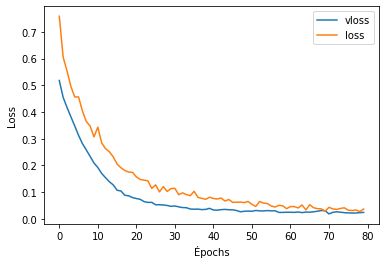

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(vloss)
plt.plot(loss)
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend(['vloss','loss']);

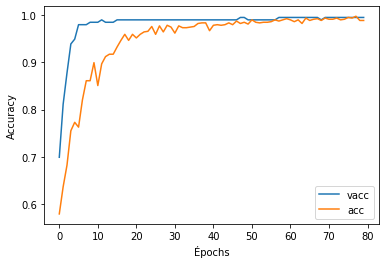

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(vacc)
plt.plot(acc)
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend(['vacc','acc']);

In [18]:
preds = model.predict(x_test1mlp)

In [19]:
preds

array([[1.22350044e-04],
       [6.03692351e-05],
       [9.34076961e-05],
       [9.98025179e-01],
       [9.99143481e-01],
       [9.99533653e-01],
       [9.99484777e-01],
       [9.98938739e-01],
       [9.99250352e-01],
       [9.98844147e-01],
       [1.47924628e-04],
       [1.33312424e-04],
       [6.58383942e-05],
       [9.98844028e-01],
       [1.44074147e-04],
       [1.75975292e-04],
       [9.98528838e-01],
       [9.98927295e-01],
       [9.99728024e-01],
       [1.71332213e-04],
       [9.98486280e-01],
       [1.60812400e-04],
       [5.55408078e-05],
       [9.04684348e-05],
       [1.03534825e-04],
       [1.67884064e-04],
       [5.42734233e-05],
       [9.98517573e-01],
       [9.98126924e-01],
       [9.98877227e-01],
       [8.81704837e-05],
       [1.01138037e-04],
       [1.20306606e-04],
       [9.25081549e-05],
       [4.53888497e-04],
       [9.97986555e-01],
       [9.99766767e-01],
       [1.27777210e-04],
       [7.40627511e-05],
       [9.98817086e-01],


In [20]:
pred=[]
for i in range(len(preds)):
    if preds[i]<=[0.5]:
        pred.append(1)
    else:
        pred.append(0)

In [21]:
pred

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1]

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test1,pred))
print(confusion_matrix(y_test1,pred))
print(classification_report(y_test1,pred))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-fd854ca9f08e>", line 3, in <module>
    print(accuracy_score(y_test1,pred))
NameError: name 'y_test1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\U

NameError: name 'y_test1' is not defined

# Delay of 7

In [31]:
x_train1mlp, x_test1mlp, y_train1mlp, y_test1mlp = train_test_split(D20, L20, test_size=0.20, random_state=0,shuffle=True)

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_trainmlp, y_trainmlp,
                    epochs=80,
                    batch_size=64,
                    validation_data=(x_testmlp, y_testmlp))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-96beb3bd818e>", line 7, in <module>
    validation_data=(x_testmlp, y_testmlp))
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\keras\engine\training.py", line 1154, in fit
    batch_size=batch_size)
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\keras\engine\training.py", line 579, in _standardize_user_data
    exception_prefix='input')
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\keras\engine\training_utils.py", line 145, in standardize_input_data
    str(data_shape))
ValueError: Error when checking input: expected dense_1_input to have shape (1700,) but got array with shape (647,)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ritvik

ValueError: Error when checking input: expected dense_1_input to have shape (1700,) but got array with shape (647,)

In [33]:
preds11 = model.predict(x_testmlp)
preds11
pred11=[]
for i in range(len(preds11)):
    if preds11[i]<=[0.5]:
        pred11.append(1)
    else:
        pred11.append(0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-12376eed8a12>", line 1, in <module>
    preds11 = model.predict(x_testmlp)
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\keras\engine\training.py", line 1441, in predict
    x, _, _ = self._standardize_user_data(x)
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\keras\engine\training.py", line 579, in _standardize_user_data
    exception_prefix='input')
  File "C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\keras\engine\training_utils.py", line 145, in standardize_input_data
    str(data_shape))
ValueError: Error when checking input: expected dense_1_input to have shape (1700,) but got array with shape (647,)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File

ValueError: Error when checking input: expected dense_1_input to have shape (1700,) but got array with shape (647,)

# RNN

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model = Sequential()
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2, input_shape=(80, 1)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 70,721
Trainable params: 70,721
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
            metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train,
                    epochs=25,batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=8
                                                               )])

Train on 700 samples, validate on 300 samples
Epoch 1/25
700/700 [==============================] - 2s 4ms/step - loss: 0.6773 - accuracy: 0.5357 - val_loss: 0.6719 - val_accuracy: 0.5600
Epoch 2/25
700/700 [==============================] - 2s 2ms/step - loss: 0.6698 - accuracy: 0.5671 - val_loss: 0.6610 - val_accuracy: 0.6633
Epoch 3/25
700/700 [==============================] - 2s 2ms/step - loss: 0.6591 - accuracy: 0.6014 - val_loss: 0.6490 - val_accuracy: 0.7533
Epoch 4/25
700/700 [==============================] - 2s 2ms/step - loss: 0.6496 - accuracy: 0.6071 - val_loss: 0.6366 - val_accuracy: 0.8200
Epoch 5/25
700/700 [==============================] - 1s 2ms/step - loss: 0.6403 - accuracy: 0.6529 - val_loss: 0.6262 - val_accuracy: 0.8733
Epoch 6/25
700/700 [==============================] - 1s 2ms/step - loss: 0.6284 - accuracy: 0.7071 - val_loss: 0.6156 - val_accuracy: 0.9200
Epoch 7/25
700/700 [==============================] - 2s 2ms/step - loss: 0.6160 - accuracy: 0.7043 - 

1.0
[[150   0]
 [  0 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



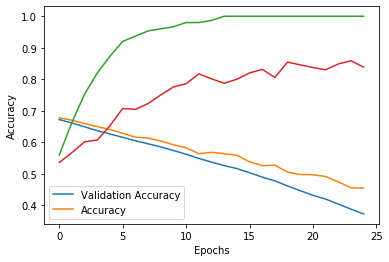

In [37]:
v_loss=history.history['val_loss']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']

import matplotlib.pyplot as plt

plt.plot(v_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['v_loss','loss']);

plt.plot(val_acc)
plt.plot(acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy','Accuracy']);

out =  model.predict(x_test)

op = []
for i in range(len(out)):
  if (out[i]) <= [0.5]:
    op.append(0)
  else:
    op.append(1)
    
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,op))
print(confusion_matrix(y_test,op))
print(classification_report(y_test,op))

# Test dataset

In [38]:
Test=pd.read_csv(r'D:\hmw4test.csv',header=None)

In [39]:
Test

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
496,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
497,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
498,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [40]:
Test1 = Test.iloc[:,:-1]
yTest = Test.iloc[:,-1]
Test1 = np.array(Test1)


In [41]:
Test.shape

(500, 81)

In [42]:
Test1 = np.reshape(Test1,(Test1.shape[0],Test1.shape[1],1))

In [43]:
yTest=np.array(yTest)

In [44]:
W=model.predict(Test1)

In [45]:
W[0:50]

array([[0.61856425],
       [0.6146405 ],
       [0.5273766 ],
       [0.61845136],
       [0.5869456 ],
       [0.5393959 ],
       [0.6202644 ],
       [0.61831474],
       [0.616715  ],
       [0.60003823],
       [0.5685132 ],
       [0.62015486],
       [0.4773205 ],
       [0.5394106 ],
       [0.62119144],
       [0.45317146],
       [0.5390313 ],
       [0.5789122 ],
       [0.44147825],
       [0.5114142 ],
       [0.48132205],
       [0.58094805],
       [0.45523134],
       [0.6146721 ],
       [0.43350127],
       [0.5698556 ],
       [0.45061234],
       [0.38378802],
       [0.51592046],
       [0.53450805],
       [0.5639633 ],
       [0.5399405 ],
       [0.554213  ],
       [0.48539656],
       [0.45849007],
       [0.45332965],
       [0.45876953],
       [0.5879411 ],
       [0.54744035],
       [0.5699949 ],
       [0.4412794 ],
       [0.41774473],
       [0.4303445 ],
       [0.32823032],
       [0.5209101 ],
       [0.4936629 ],
       [0.43820617],
       [0.521

In [46]:
op = []
for i in range(len(W)):
  if (W[i]) <= [0.5]:
    op.append(0)
  else:
    op.append(1)
 

In [47]:
op

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# Confusion matrix

In [48]:
   
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(yTest,op))
print(confusion_matrix(yTest,op))
print(classification_report(yTest,op))

0.818
[[159  91]
 [  0 250]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       250
           1       0.73      1.00      0.85       250

    accuracy                           0.82       500
   macro avg       0.87      0.82      0.81       500
weighted avg       0.87      0.82      0.81       500



# Using Conv1d

# Delay of 7

In [49]:
a=pd.read_csv(r'D:\class0_80.csv', header=None)
b=pd.read_csv(r'D:\class1_80.csv', header=None)
A=pd.concat([a,b])

In [50]:
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D,MaxPooling1D
from keras.layers import Flatten,Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
c1conv = A.iloc[:,:-1]
yconv = A.iloc[:,-1]
c1conv=np.array(c1conv)
c1conv=c1conv.reshape(1000,80,1)

In [51]:
from sklearn.model_selection import train_test_split

x_trainconv, x_testconv, y_trainconv, y_testconv = train_test_split(c1conv, yconv, test_size=0.3,stratify=yconv, shuffle=True)


In [52]:
x_trainconv.shape

(700, 80, 1)

In [53]:
C = Sequential()
C.add(Conv1D(32, 7, input_shape = x_trainconv.shape[1:3], activation = 'relu'))
C.add(MaxPooling1D(2))
C.add(Flatten())
C.add(Dense(1, activation = 'sigmoid'))
S = keras.optimizers.SGD(lr = 0.001, momentum = 0.9, decay = 0, nesterov = False)
C.compile(loss = 'binary_crossentropy', optimizer = S, metrics = ['accuracy'])
C.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 1)

Epoch 1/20
700/700 [==============================] - 0s 346us/step - loss: 0.6943 - accuracy: 0.5043
Epoch 2/20
700/700 [==============================] - 0s 76us/step - loss: 0.6847 - accuracy: 0.6000
Epoch 3/20
700/700 [==============================] - 0s 74us/step - loss: 0.6701 - accuracy: 0.6214
Epoch 4/20
700/700 [==============================] - 0s 70us/step - loss: 0.6535 - accuracy: 0.5957
Epoch 5/20
700/700 [==============================] - 0s 68us/step - loss: 0.6353 - accuracy: 0.5786
Epoch 6/20
700/700 [==============================] - 0s 67us/step - loss: 0.6173 - accuracy: 0.5586
Epoch 7/20
700/700 [==============================] - 0s 73us/step - loss: 0.5985 - accuracy: 0.5543
Epoch 8/20
700/700 [==============================] - 0s 68us/step - loss: 0.5795 - accuracy: 0.5557
Epoch 9/20
700/700 [==============================] - 0s 73us/step - loss: 0.5600 - accuracy: 0.5586
Epoch 10/20
700/700 [==============================] - 0s 74us/step - loss: 0.5400 - accur

In [54]:
predconv = C.predict(x_testconv)

opconv = []
for i in range(len(predconv)):
  if (predconv[i]) <= [0.5]:
    opconv.append(0)
  else:
    opconv.append(1)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_testconv,opconv))
print(confusion_matrix(y_testconv,opconv))
print(classification_report(y_testconv,opconv))

1.0
[[150   0]
 [  0 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Delay of 20

In [56]:
C1 = Sequential()
C1.add(Conv1D(32, 20, input_shape = x_trainconv.shape[1:3], activation = 'relu'))
C1.add(MaxPooling1D(2))
C1.add(Flatten())
C1.add(Dense(1, activation = 'sigmoid'))
S1 = keras.optimizers.SGD(lr = 0.001, momentum = 0.9, decay = 0, nesterov = False)
C1.compile(loss = 'binary_crossentropy', optimizer = S, metrics = ['accuracy'])
C1.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 1)

Epoch 1/20
700/700 [==============================] - 0s 298us/step - loss: 0.6641 - accuracy: 0.6743
Epoch 2/20
700/700 [==============================] - 0s 56us/step - loss: 0.6421 - accuracy: 0.6171
Epoch 3/20
700/700 [==============================] - 0s 56us/step - loss: 0.6107 - accuracy: 0.5629
Epoch 4/20
700/700 [==============================] - 0s 57us/step - loss: 0.5795 - accuracy: 0.5300
Epoch 5/20
700/700 [==============================] - 0s 58us/step - loss: 0.5523 - accuracy: 0.5129
Epoch 6/20
700/700 [==============================] - 0s 57us/step - loss: 0.5283 - accuracy: 0.5100
Epoch 7/20
700/700 [==============================] - 0s 58us/step - loss: 0.5070 - accuracy: 0.5129
Epoch 8/20
700/700 [==============================] - 0s 58us/step - loss: 0.4869 - accuracy: 0.5243
Epoch 9/20
700/700 [==============================] - 0s 58us/step - loss: 0.4670 - accuracy: 0.5643
Epoch 10/20
700/700 [==============================] - 0s 57us/step - loss: 0.4466 - accur

In [57]:
predconv1 = C1.predict(x_testconv)

opconv1 = []
for i in range(len(predconv)):
  if (predconv1[i]) <= [0.5]:
    opconv1.append(0)
  else:
    opconv1.append(1)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_testconv,opconv1))
print(confusion_matrix(y_testconv,opconv1))
print(classification_report(y_testconv,opconv1))

1.0
[[150   0]
 [  0 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Test data

In [30]:
test_dataconv = pd.read_csv(r'D:\hmw4test.csv',header=None)

In [1012]:
test_data1 = test_dataconv.iloc[:,:-1]
labelsconv= test_dataconv.iloc[:,-1]
test_data1=np.array(test_data1)
test_data1 = test_data1.reshape(500,80,1)
predictionconv = C.predict(test_data1)

In [1013]:
op1conv = []
for i in range(len(predictionconv)):
  if (predictionconv[i]) <= [0.5]:
    op1conv.append(0)
  else:
    op1conv.append(1)

In [1014]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(labelsconv,op1conv))
print(confusion_matrix(labelsconv,op1conv))
print(classification_report(labelsconv,op1conv))

0.888
[[194  56]
 [  0 250]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.87       250
           1       0.82      1.00      0.90       250

    accuracy                           0.89       500
   macro avg       0.91      0.89      0.89       500
weighted avg       0.91      0.89      0.89       500

